# **Урок 4. Визуальный анализ данных**
---
### *`Условие 1:`*
- *Постройте график*
- *Назовите график*
- *Сделайте именование оси x и оси y*
- *Сделайте выводы*

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


> ### **Изучите стоимости недвижимости**

*Определим количество аномально высоких значений признака цены, чтобы показать правильный график*

In [2]:
display(df['price'].describe())
print(f"Количество значений цены домов больше 2 миллионов: {(df['price'] > 2_000_000).sum()}")

count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

Количество значений цены домов больше 2 миллионов: 198


*В нашем случае, всего 198 значений выше 2 миллионов, что меньше 10% от всего датасета, можем не учитывать их при построении графика.*

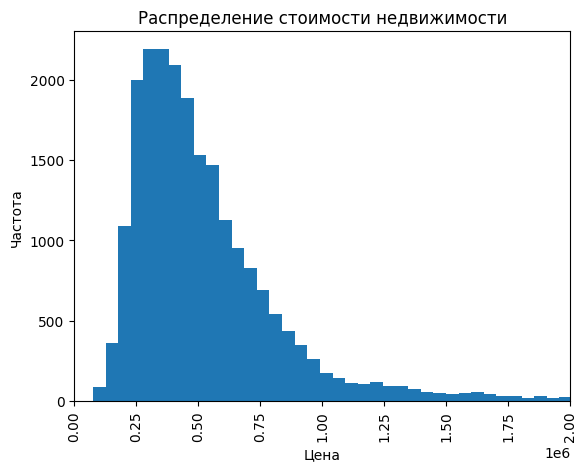

In [3]:
plt.hist(df['price'], bins=150)
plt.xlim(0, 2_000_000)
plt.title('Распределение стоимости недвижимости')
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.xticks(rotation=90)
plt.show()

> ### **Изучите распределение квадратуры жилой**

In [4]:
display(df['sqft_living'].describe())
print(f"Количество значений домов с жилой площадью более 5.000 кв.м: {(df['sqft_living'] > 5_000).sum()}")

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

Количество значений домов с жилой площадью более 5.000 кв.м: 211


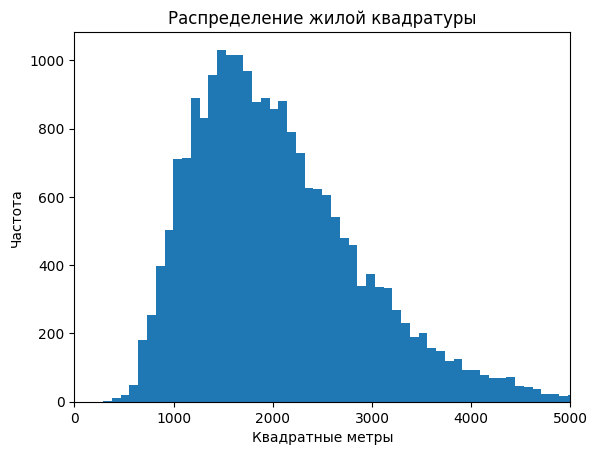

In [5]:
plt.hist(df['sqft_living'], bins=150)
plt.xlim(0, 5_000)
plt.title('Распределение жилой квадратуры')
plt.xlabel('Квадратные метры')
plt.ylabel('Частота')
plt.show()

*По графику мы можем определить, то что распределение нормальное, а так же то, что основная часть домов имеет квадратную жилую площадь в интервале от 1200 до 2700*

> ### **Изучите распределение года постройки**

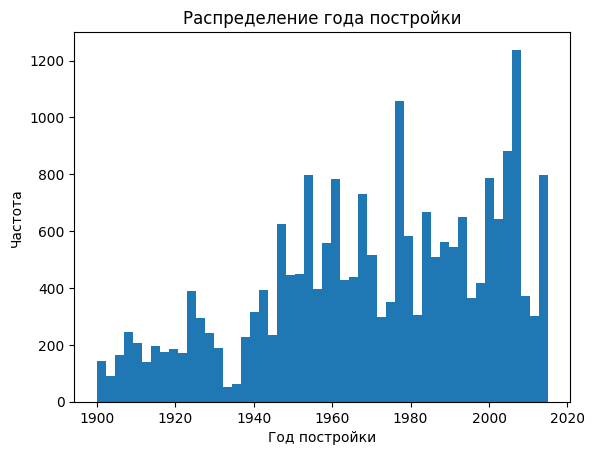

In [6]:
plt.hist(df['yr_built'], bins=50)
plt.title('Распределение года постройки')
plt.xlabel('Год постройки')
plt.ylabel('Частота')
plt.show()

### *`Условие 2:`*

> ### **Изучите распределение домов от наличия вида на набережную**
- *Постройте график*
- *Сделайте выводы*

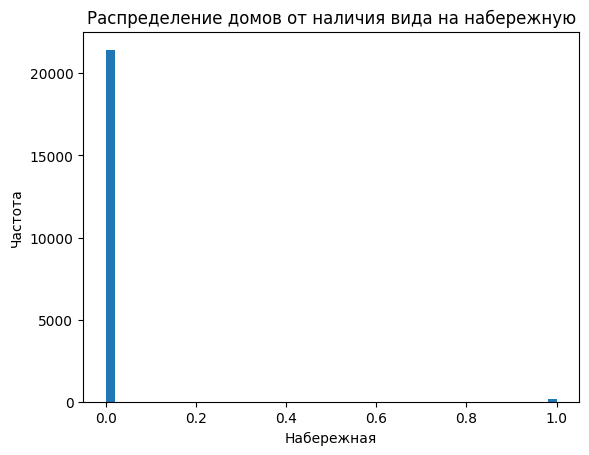

In [7]:
plt.hist(df['waterfront'], bins=50)
plt.title('Распределение домов от наличия вида на набережную')
plt.xlabel('Набережная')
plt.ylabel('Частота')
plt.show()

*В абсолютном большинстве дома не имеют вида на набережную.*

> ### **Изучите распределение состояния домов**

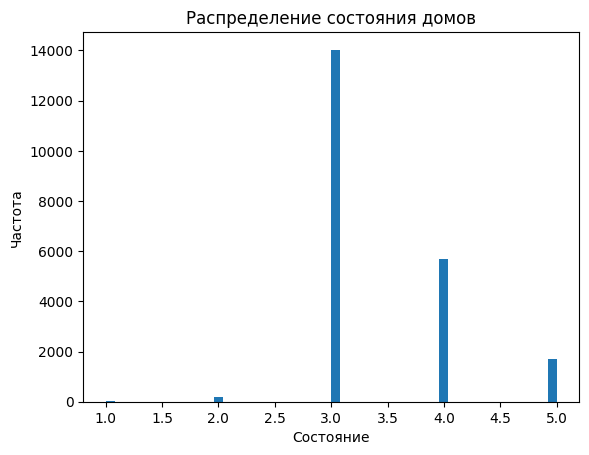

In [8]:
plt.hist(df['condition'], bins=50)
plt.title('Распределение состояния домов')
plt.xlabel('Состояние')
plt.ylabel('Частота')
plt.show()

*В большинстве случае оценка состояния у домов находится в районе 3, меньше в 4, и совсем немного домов имеют оценку в 5 баллов.*

### *`Условие 3:`*

> ### **Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.**

Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

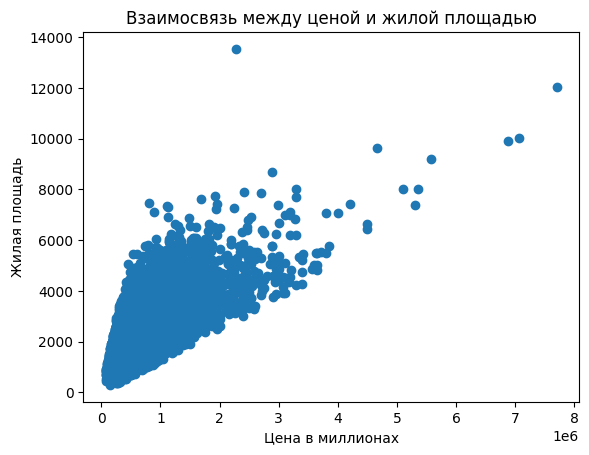

In [9]:
plt.scatter(df['price'], df['sqft_living'])
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylabel('Жилая площадь')
plt.show()

*По `scatterplot'у` мы можем заметить, что большинство домов находятся в пределах 2.5 миллионов и до 5.000 квадратных метров. Так же можем отметить выбросы, например один из домов за 2.5 миллиона имеет площадь почти в 14.000 квадратных метров, или же например один из домов с 12.000 квадратными метрами имеет цену в 7.7 миллионов.*

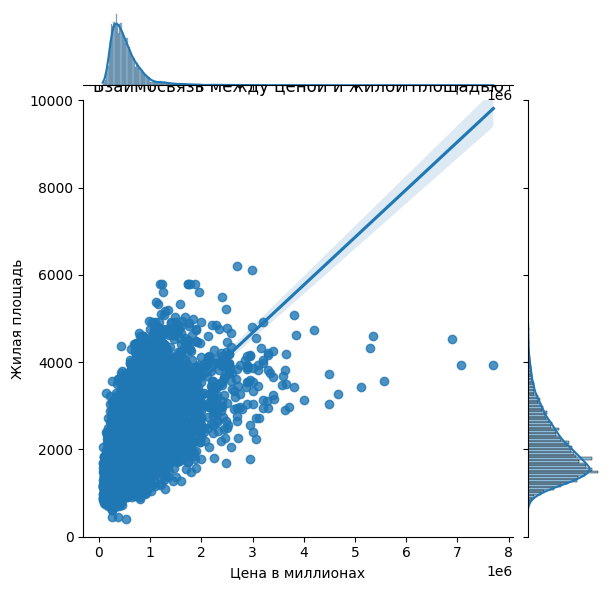

In [10]:
sns.jointplot(x=df['price'], y=df['sqft_living15'], kind='reg')
plt.title('Взаимосвязь между ценой и жилой площадью')
plt.xlabel('Цена в миллионах')
plt.ylim(0, 10000)
plt.ylabel('Жилая площадь')
plt.show()

*По `jointplot` мы можем определить, что чем выше была жилая площадь, тем была выше цена. В основном дома из данных имеют площадь до 5.000 кв.м и до 2.5 миллионов цены.*

C:\Users\desmo\AppData\Local\Temp\ipykernel_6308\2548424402.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


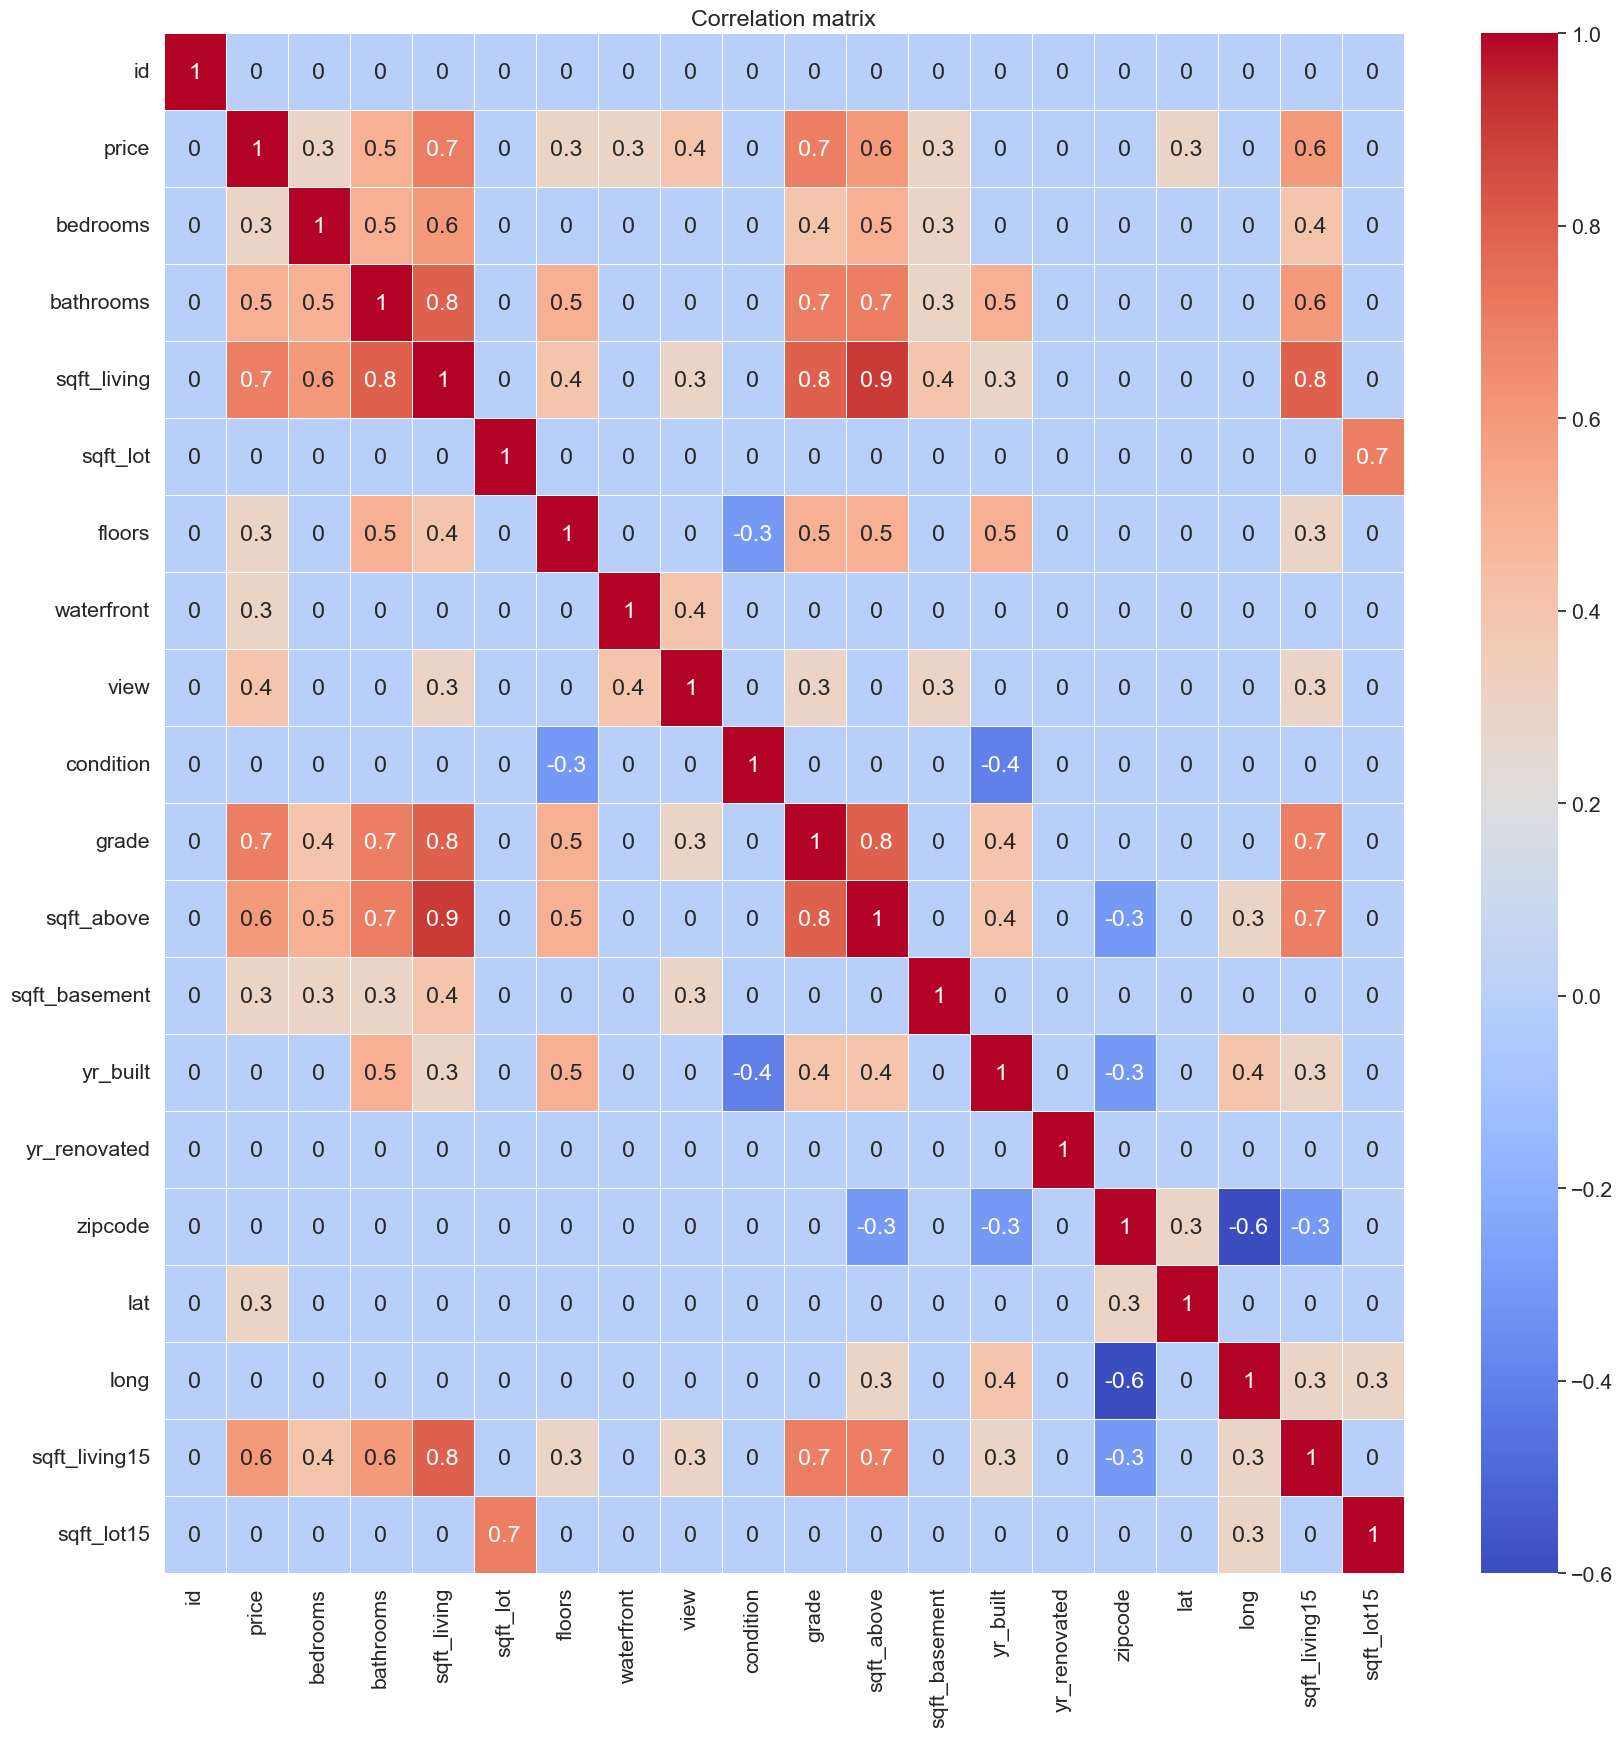

In [11]:
import numpy as np

corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
plt.figure(figsize=(20, 20))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

*По `heatmap` мы можем определить по каким признакам имеется взаимосвязь у цены.*
- `batrooms` 0.5
- `sqft_living` 0.7
- `grade` 0.7
- `sqft_above` 0.6
- `sqft_living15` 0.6

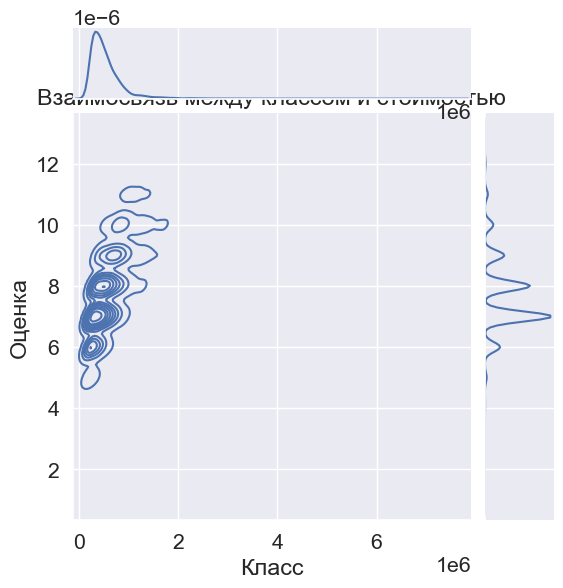

In [12]:
sns.jointplot(x=df['price'], y=df['grade'], kind='kde')
plt.title('Взаимосвязь между классом и стоимостью')
plt.xlabel('Класс')
plt.ylabel('Оценка')
plt.show()

*Отсюда можем заметить, что чем выше класс, тем выше стоимость, в основном дома сосредоточены в 7 классе и ценой до миллиона*

<AxesSubplot: xlabel='price'>

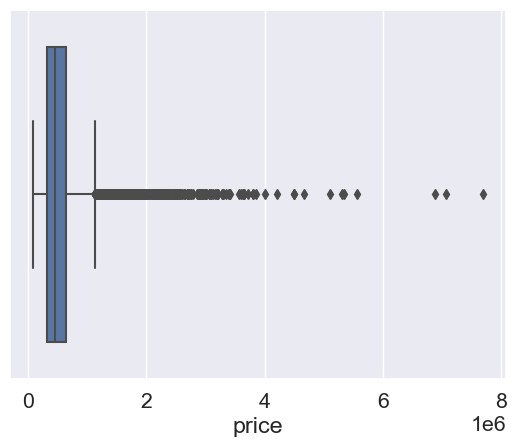

In [13]:
sns.boxplot(x=df['price'], whis=1.5)

*Отсюда можем заметить, что основная масса всех домов находится в районе 500-700 тысяч стоимости, и огромное количество выбросов.*